# IPL Data Analysis (2008–2019)

This project performs an exploratory analysis of Indian Premier League (IPL) match and ball-by-ball data to uncover patterns related to team success, player contribution, bowling efficiency, and match strategy.

The focus is not on just “who scored” or “who won”, but on **why** teams win and which player roles actually influence outcomes.


# Importing the librabries that will be used.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview

Two datasets are used:

### matches.csv (Match-level data)
Includes:
- Season
- Teams
- Venue
- Toss winner
- Match winner
- Player of the match

### deliveries.csv (Ball-by-ball data)
Includes:
- Over & ball number
- Batsman & bowler
- Runs
- Wicket information
- Extras

These datasets were merged on `match_id` to allow deep performance analysis down to delivery level.


# Load the csv dataset

In [59]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [60]:
delivery_df=pd.read_csv('deliveries.csv')
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [61]:
df.rename(columns={'id':'match_id'}, inplace=True)
#matching the column names by renaming to merge them.

In [62]:
df['team1']=df['team1'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['team2']=df['team2'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['winner']=df['winner'].replace('Rising Pune Supergiants','Rising Pune Supergiant')
#making the team name same across the dataset.

In [63]:
final_df=pd.merge(df,delivery_df, on='match_id', how='left')
#merging the two datasets.

## Data Cleaning

Before analysis, the data was cleaned and standardised:

- Renamed columns to maintain consistency across datasets
- Fixed inconsistent team names
- Removed duplicate rows
- Replaced missing values with meaningful placeholders
- Standardised venue and city names

This ensures accurate grouping and reliable metrics.


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [65]:
final_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
#replacing blank spaces with nan

In [66]:
final_df.duplicated().sum()
final_df.drop_duplicates(inplace=True)
#eliminating duplicate rows.

In [67]:
final_df.dtypes

match_id             int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3             object
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
f

In [68]:
final_df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [69]:
final_df['player_dismissed']=final_df['player_dismissed'].fillna('No Wicket')
final_df['dismissal_kind']=final_df['dismissal_kind'].fillna('No Wicket')
final_df['fielder']=final_df['fielder'].fillna('No Wicket')
final_df['umpire1']=final_df['umpire1'].fillna('not available')
final_df['umpire2']=final_df['umpire2'].fillna('not available')
final_df['umpire3']=final_df['umpire3'].fillna('not available')
final_df['winner']=final_df['winner'].fillna('no result')
final_df['player_of_match']=final_df['player_of_match'].fillna('no result')
final_df['city']=final_df['city'].fillna('venue not available')
#Handling the missing values with suitable values.

In [70]:
final_df.isnull().sum()


match_id            0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

## Team Performance Analysis

This section explores which teams have dominated across IPL history and how consistent top teams differ from weaker franchises.


In [71]:
most_win=df['winner'].value_counts()
most_win

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: count, dtype: int64

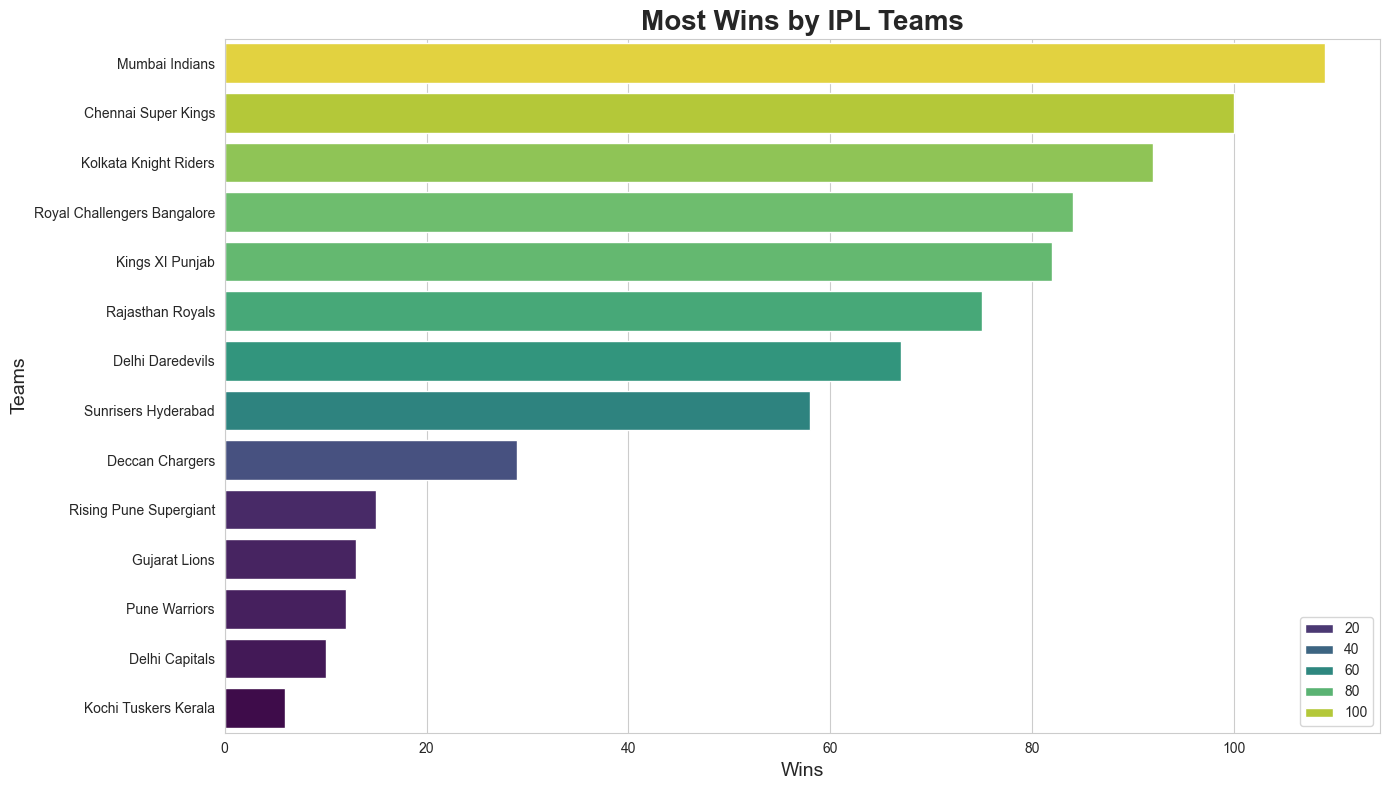

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize=(14,8))
sns.barplot(y=most_win.index, x=most_win.values, hue=most_win.values, palette="viridis")
plt.title("Most Wins by IPL Teams", fontsize=20, fontweight='bold')
plt.xlabel("Wins", fontsize=14)
plt.ylabel("Teams", fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('most wins')


In [73]:
#Teams with most win percaentage:
match_played1=df['team1'].value_counts()
match_played2=df['team2'].value_counts()
match_played=match_played1.add(match_played2)

In [74]:
wins=df['winner'].value_counts()
wins_pct=wins/match_played*100
wins_pct=wins_pct.sort_values(ascending=False)
wins_pct


Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Rising Pune Supergiant         50.000000
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Pune Warriors                  26.086957
Name: count, dtype: float64

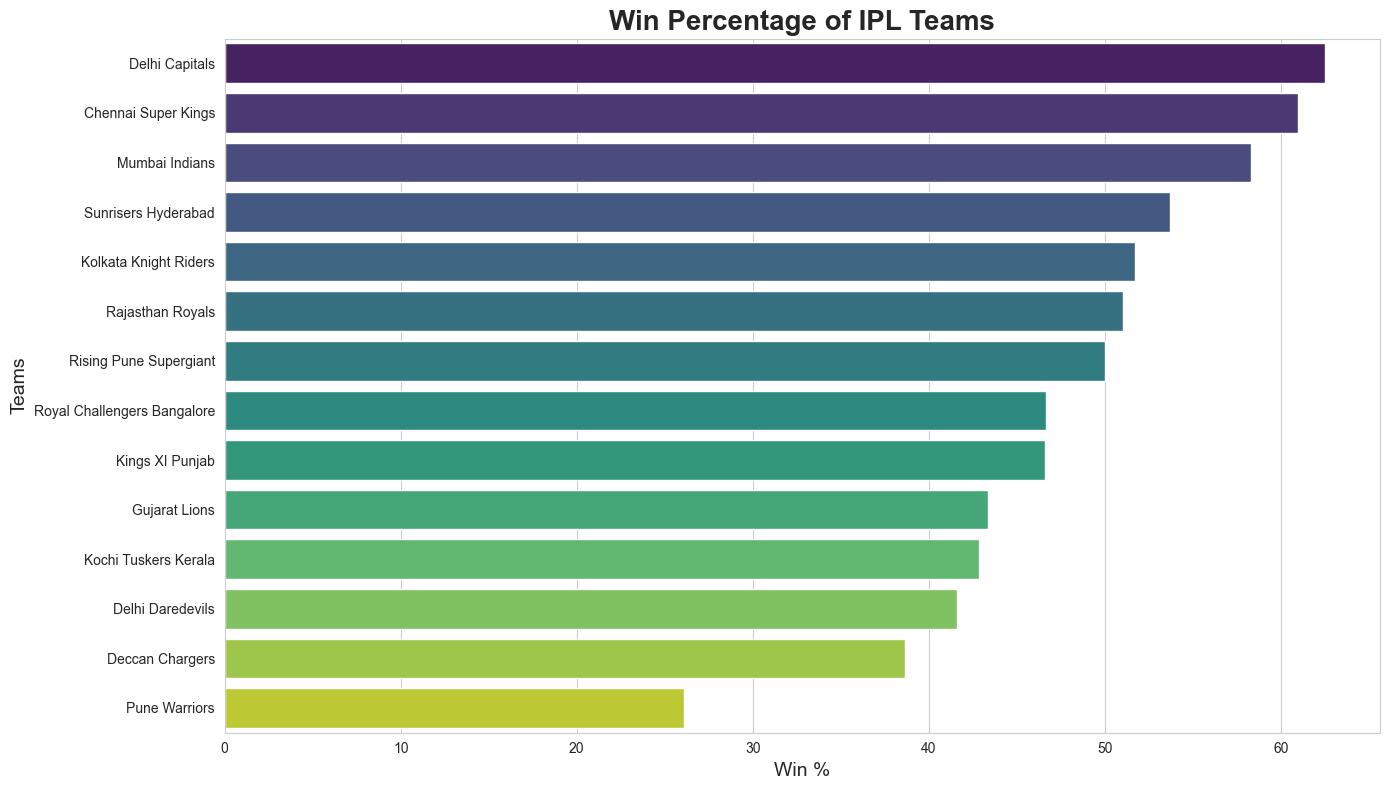

<Figure size 640x480 with 0 Axes>

In [75]:
plt.figure(figsize=(14,8))
sns.barplot(x=wins_pct.values, y=wins_pct.index, hue=wins_pct.index, palette="viridis")
plt.title("Win Percentage of IPL Teams", fontsize=20, fontweight='bold')
plt.xlabel("Win %", fontsize=14)
plt.ylabel("Teams", fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('win_pct')

### Observation  

Delhi Capitals surprisingly has the highest win %, but this is inflated by limited seasons in the “Capitals” era.  
Mumbai Indians and Chennai Super Kings consistently outperform other teams.  
This suggests that long-term dominance is driven by squad stability and balanced team composition rather than reliance on individual performances.  
Pune Warriors is the weakest franchise historically.


## Chase vs Defend Analysis

This section analyses whether teams have a statistical advantage while chasing or defending a target in IPL matches.


In [76]:
df['win_type']= np.where(df['win_by_runs']>0,'defend(bat first)', np.where(df['win_by_wickets']>0,'chase(bowl first)','no result'))	
df['win_type']
df.groupby(['winner','win_type']).size().reset_index(name='count')

,winner,win_type,count
0,Chennai Super Kings,chase(bowl first),48
1,Chennai Super Kings,defend(bat first),52
2,Deccan Chargers,chase(bowl first),11
3,Deccan Chargers,defend(bat first),18
4,Delhi Capitals,chase(bowl first),6
5,Delhi Capitals,defend(bat first),3
6,Delhi Capitals,no result,1
7,Delhi Daredevils,chase(bowl first),42
8,Delhi Daredevils,defend(bat first),25
9,Gujarat Lions,chase(bowl first),12


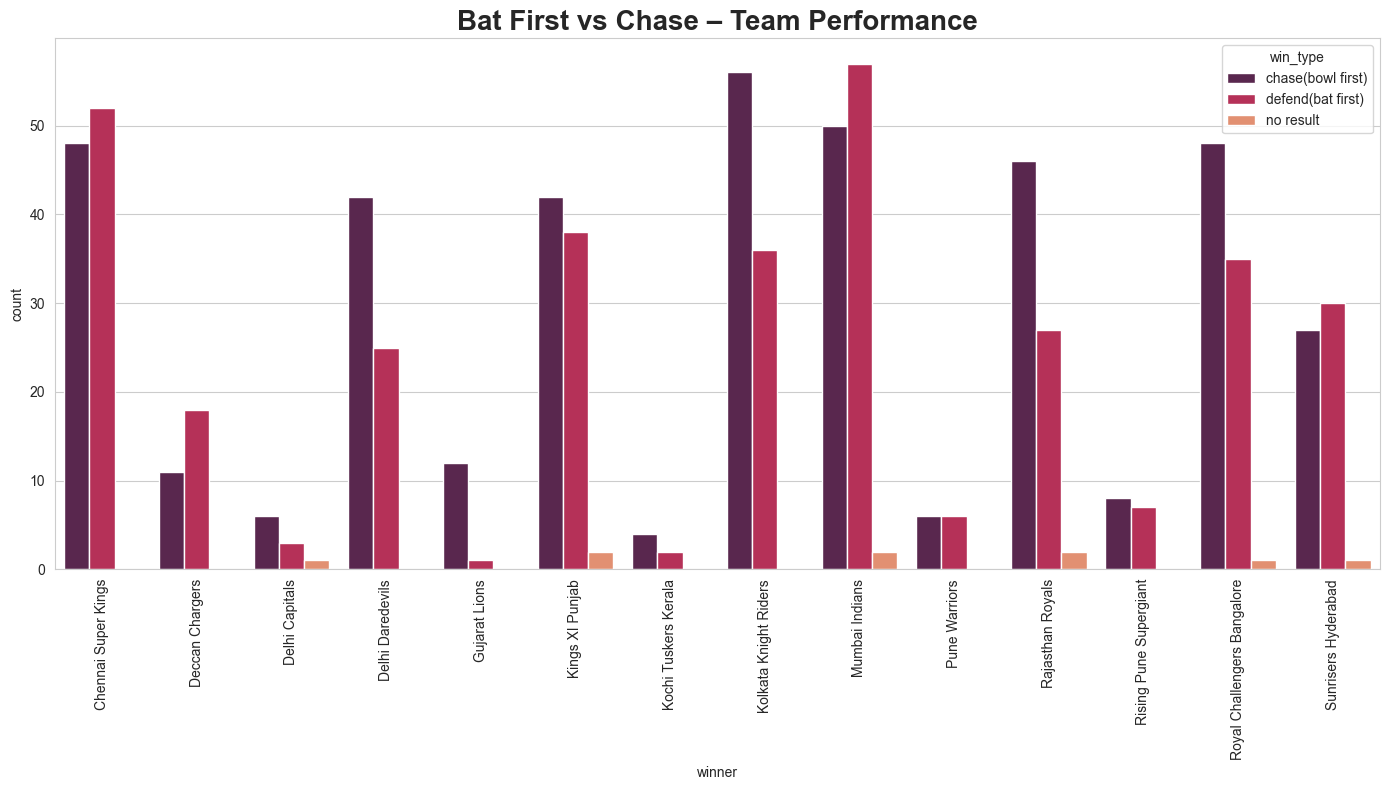

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(14,8))
sns.barplot(data=df.groupby(['winner','win_type']).size().reset_index(name='count'),
    x='winner', y='count', hue='win_type',palette='rocket')
plt.xticks(rotation=90)
plt.title("Bat First vs Chase – Team Performance", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig('chase vs defend')

### Observation

The data suggests that chasing does not guarantee a consistent advantage across IPL seasons.

While certain venues and matches favor chasing due to dew and pitch behavior, the overall win rate between chasing and defending remains relatively balanced.

This indicates that:
- Team composition matters more than batting order
- Defending can be equally effective if bowling resources are strong
- Match context (pitch, pressure, and powerplay utilization) outweighs the theoretical advantage of chasing


## Orange Cap Analysis (Top Run Scorers)

This section identifies season-wise run leaders to examine how batting dominance shifts over time.


In [78]:
runs_per_season=final_df.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index()
runs_per_season
total_runs = runs_per_season.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).reset_index(name='runs')
print(total_runs)

          batsman  runs
0         V Kohli  5434
1        SK Raina  5415
2       RG Sharma  4914
3       DA Warner  4741
4        S Dhawan  4631
5        CH Gayle  4560
6        MS Dhoni  4477
7      RV Uthappa  4444
8  AB de Villiers  4428
9       G Gambhir  4223


In [79]:
#Orange Cap winners in each season:
orange_cap_per_season = runs_per_season.sort_values(['season','batsman_runs'], ascending=[True,False]).groupby('season').head(1)
orange_cap_per_season.reset_index(drop=True)

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,617
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


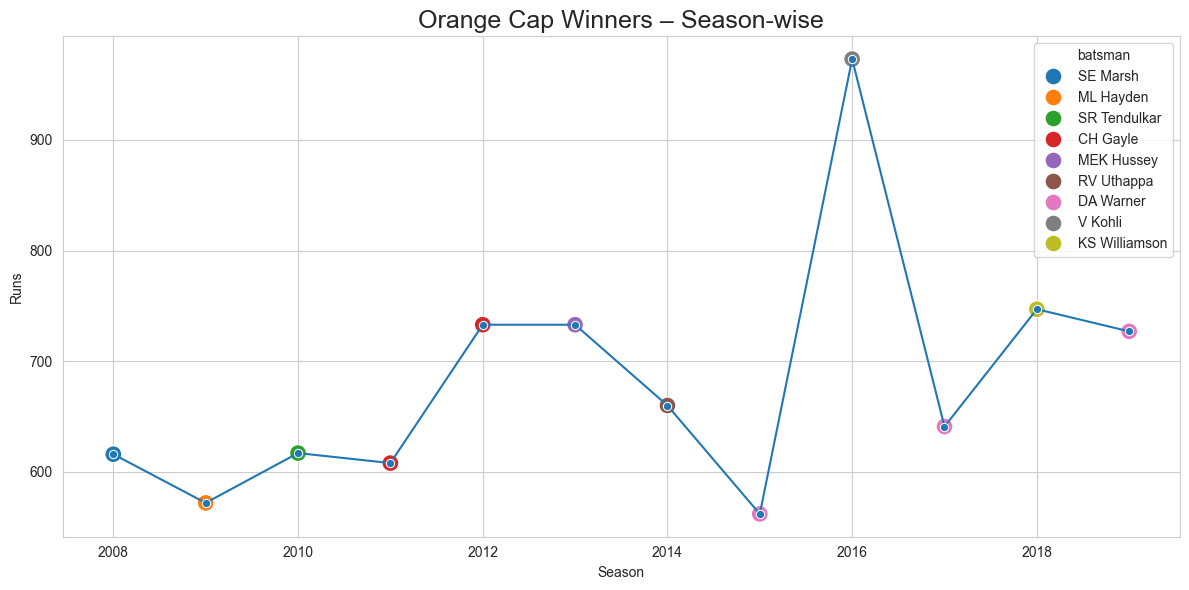

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(data=orange_cap_per_season, x='season', y='batsman_runs', marker='o')
sns.scatterplot(data=orange_cap_per_season, x='season', y='batsman_runs', hue='batsman', s=150)

plt.title("Orange Cap Winners – Season-wise", fontsize=18)
plt.xlabel("Season")
plt.ylabel("Runs")
plt.tight_layout()
plt.show()
plt.savefig('orange cap')

### Insight

Run leaders change almost every season, highlighting how competitive IPL batting is.  
David Warner is the most consistent Orange Cap winner in IPL history, securing the award in three different seasons  
Kohli’s 2016 season remains a statistical outlier, proving that exceptional form matters but consistency is rare.


## Purple Cap Analysis (Top Wicket Takers)


In [81]:
wicket_df=final_df[final_df['player_dismissed']!='No Wicket']
wkt_per_season=wicket_df.groupby(['season','bowler'])['player_dismissed'].count().sort_values(ascending=False).reset_index(name='wicket')
total_wkt=wkt_per_season.groupby('bowler')['wicket'].sum().sort_values(ascending=False).head(10).reset_index()
total_wkt

,bowler,wicket
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


In [82]:
#Purple Cap winner in each season:
purple_cap_per_season=wkt_per_season.sort_values(['season','wicket'],ascending=[True,False]).groupby('season').head(1)
purple_cap_per_season.reset_index(drop=True)

,season,bowler,wicket
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


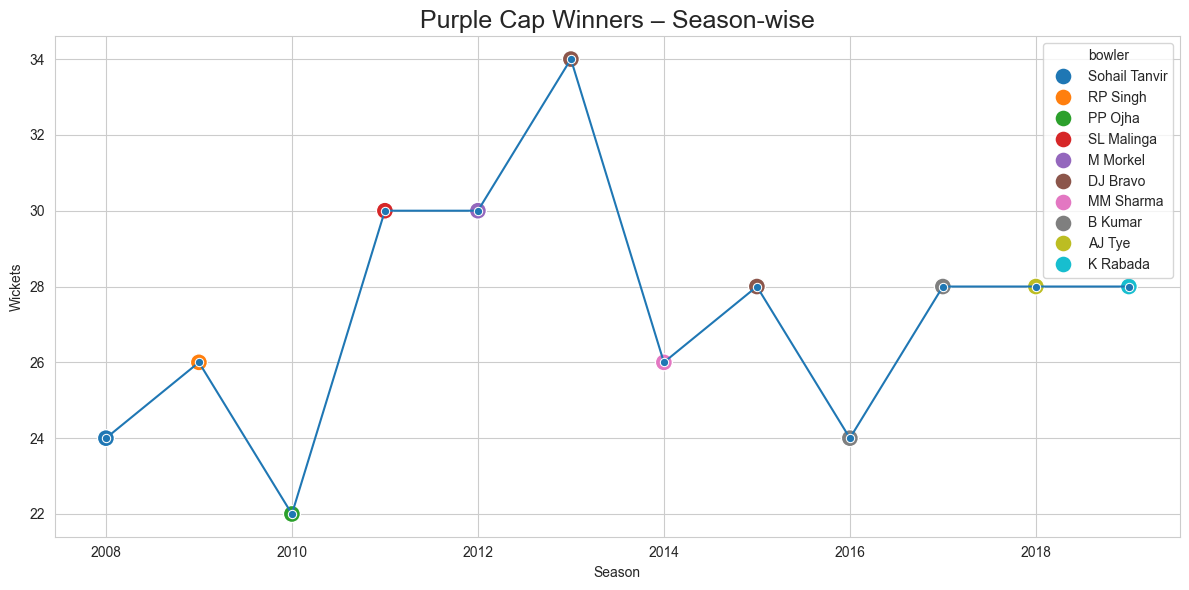

<Figure size 640x480 with 0 Axes>

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=purple_cap_per_season, x='season', y='wicket', marker='o')
sns.scatterplot(data=purple_cap_per_season, x='season', y='wicket', hue='bowler', s=150)

plt.title("Purple Cap Winners – Season-wise", fontsize=18)
plt.xlabel("Season")
plt.ylabel("Wickets")
plt.tight_layout()
plt.show()
plt.savefig('purple cap')

### Insight

Unlike batting, bowling dominance is less season-stable.  
B Kumar and DJ Bravo have shown their consistency by their perfomance and both haave two purple caps.  
Wicket leaders rotate more frequently, showing bowling effectiveness is more sensitive to pitch conditions and game phase.


## Batting Strike Rate Analysis

Strike rate measures true T20 impact rather than volume runs.


In [84]:
balls_faced=final_df[final_df['wide_runs']==0].groupby('batsman').size()
runs_scored=final_df.groupby('batsman')['batsman_runs'].sum()
strike_rate=(runs_scored/balls_faced)*100
strike_rate=strike_rate.sort_values(ascending=False)
valid_sr=strike_rate[balls_faced>200]
valid_sr.head(10)

batsman
AD Russell    191.766268
SP Narine     175.327511
RR Pant       167.320261
J Bairstow    163.957597
GJ Maxwell    161.635945
HH Pandya     161.560694
CH Morris     158.536585
V Sehwag      155.441595
JC Buttler    155.374593
CH Gayle      152.968802
dtype: float64

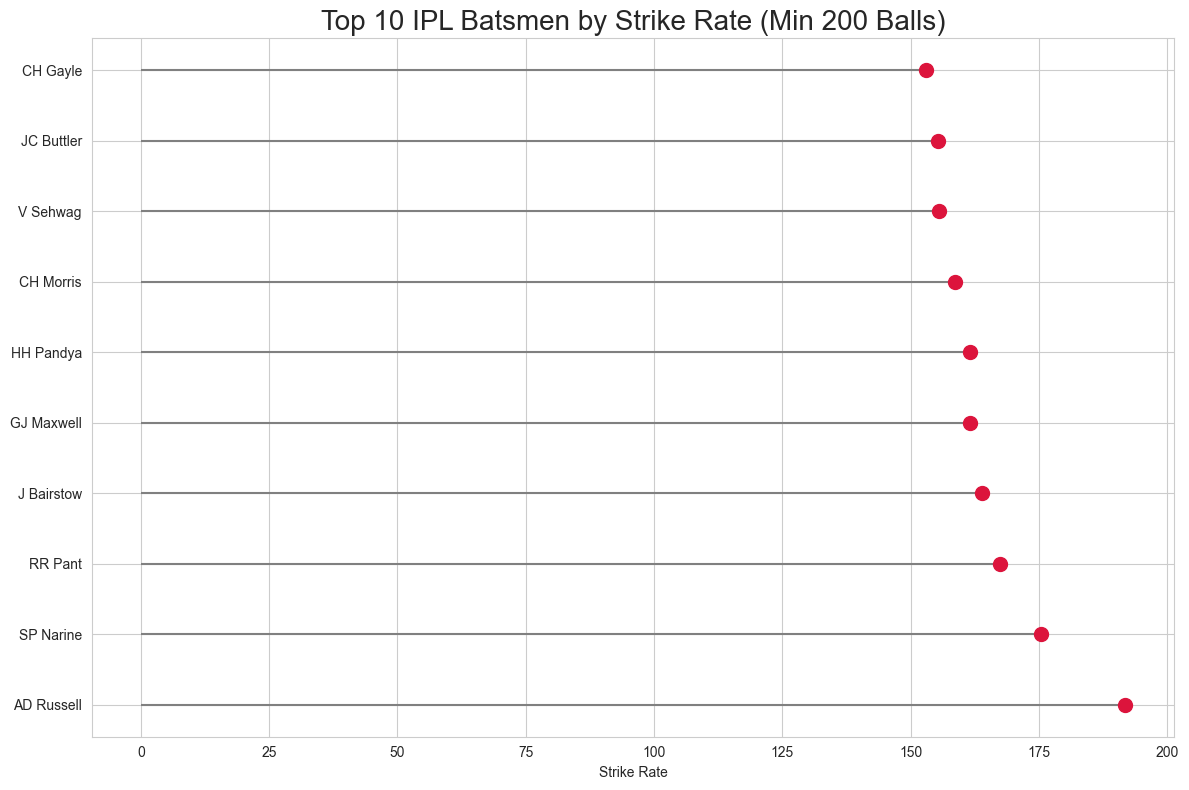

<Figure size 640x480 with 0 Axes>

In [85]:
top_sr = valid_sr.head(10)
plt.figure(figsize=(12,8))

plt.hlines(y=top_sr.index, xmin=0, xmax=top_sr.values,color='gray')
plt.plot(top_sr.values, top_sr.index, "o",markersize=10, color='crimson')

plt.title("Top 10 IPL Batsmen by Strike Rate (Min 200 Balls)", fontsize=20)
plt.xlabel("Strike Rate")
plt.tight_layout()
plt.show()
plt.savefig('strike rate')

### Insight

Players like Russell, Pant and Maxwell deliver extremely high impact per ball.  
This proves T20 success is not just about staying long but scoring fast.


## Team Run Rate Analysis

Run rate captures scoring intensity and pressure creation rather than total accumulation.

Teams with higher run rates consistently force fielding sides into defensive bowling plans and increase chances of mistakes, even when total scores are similar.

In [86]:
run_rate=final_df.groupby('batting_team')['total_runs'].mean()*6
run_rate=run_rate.sort_values(ascending=False).reset_index(name='run_rate')
run_rate
 

,batting_team,run_rate
0,Delhi Capitals,8.267296
1,Gujarat Lions,8.180595
2,Royal Challengers Bangalore,8.072232
3,Chennai Super Kings,8.021254
4,Kings XI Punjab,7.995891
5,Sunrisers Hyderabad,7.928256
6,Mumbai Indians,7.907849
7,Kolkata Knight Riders,7.888452
8,Rising Pune Supergiants,7.834177
9,Rising Pune Supergiant,7.800000


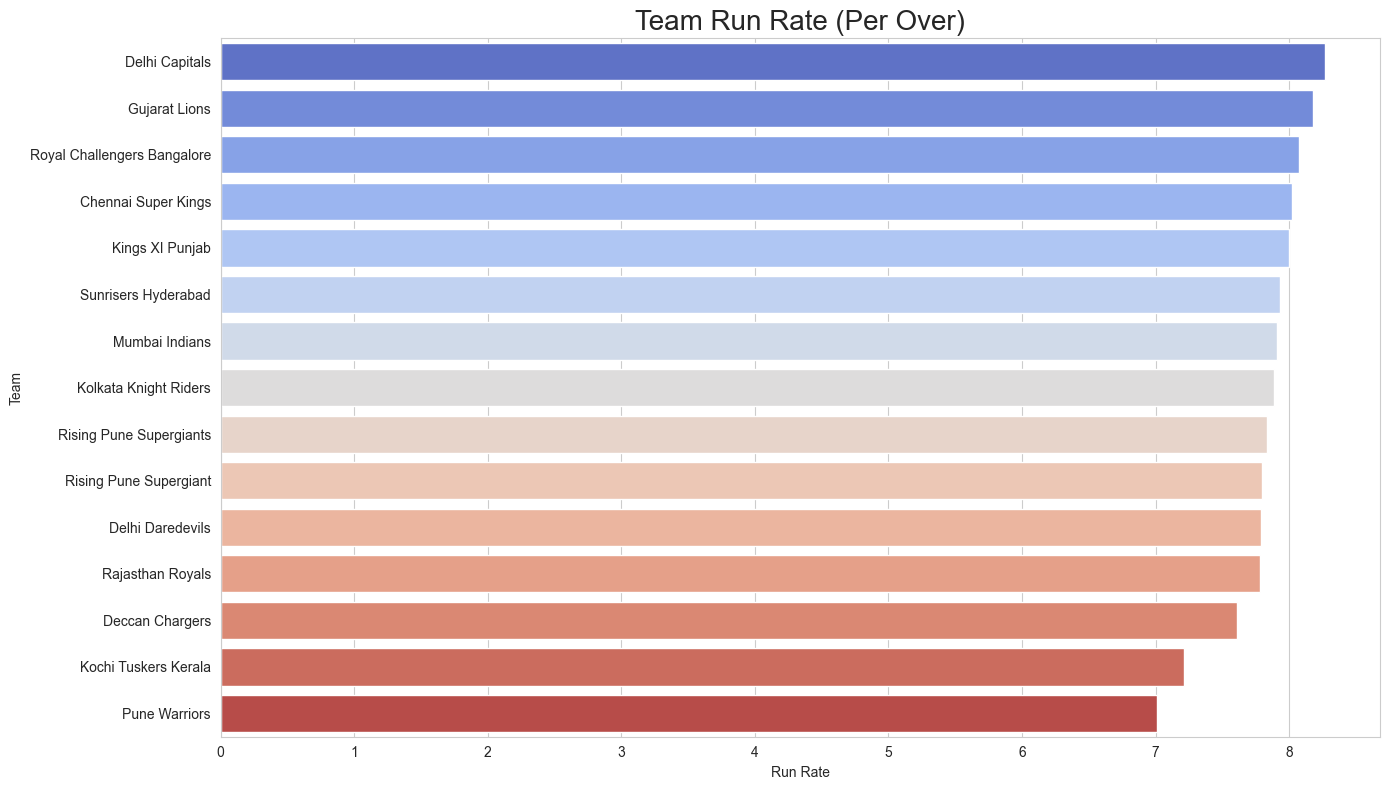

<Figure size 640x480 with 0 Axes>

In [87]:
plt.figure(figsize=(14,8))
sns.barplot(
    data=run_rate.sort_values('run_rate', ascending=False),
    x='run_rate', y='batting_team', palette='coolwarm', hue='batting_team'
)
plt.title("Team Run Rate (Per Over)", fontsize=20)
plt.xlabel("Run Rate")
plt.ylabel("Team")
plt.tight_layout()
plt.show()
plt.savefig('run rate')

## Observation:
Delhi Capitals, Gujarat Lions, RCB show the highest run rates — aggressive batting teams.  
CSK and MI are slightly below top but still consistent.  
Teams like Pune Warriors and Kochi struggled heavily in scoring rate.

## Bowling Economy Analysis

Economy rate better reflects bowling impact than raw wicket counts.


In [88]:
balls_bowled=final_df[(final_df['wide_runs']==0) & (final_df['noball_runs']==0)].groupby('bowler').size()
runs_conceded=final_df.groupby('bowler')['total_runs'].sum()
economy=(runs_conceded/balls_bowled)*6
economy=economy[balls_bowled>200]
economy.sort_values().head(10)


bowler
A Chandila        6.282051
SM Pollock        6.673913
Sohail Tanvir     6.680162
J Yadav           6.702703
A Kumble          6.770984
GD McGrath        6.777778
SP Narine         6.880218
Rashid Khan       6.887671
DL Vettori        6.903475
M Muralitharan    6.930628
dtype: float64

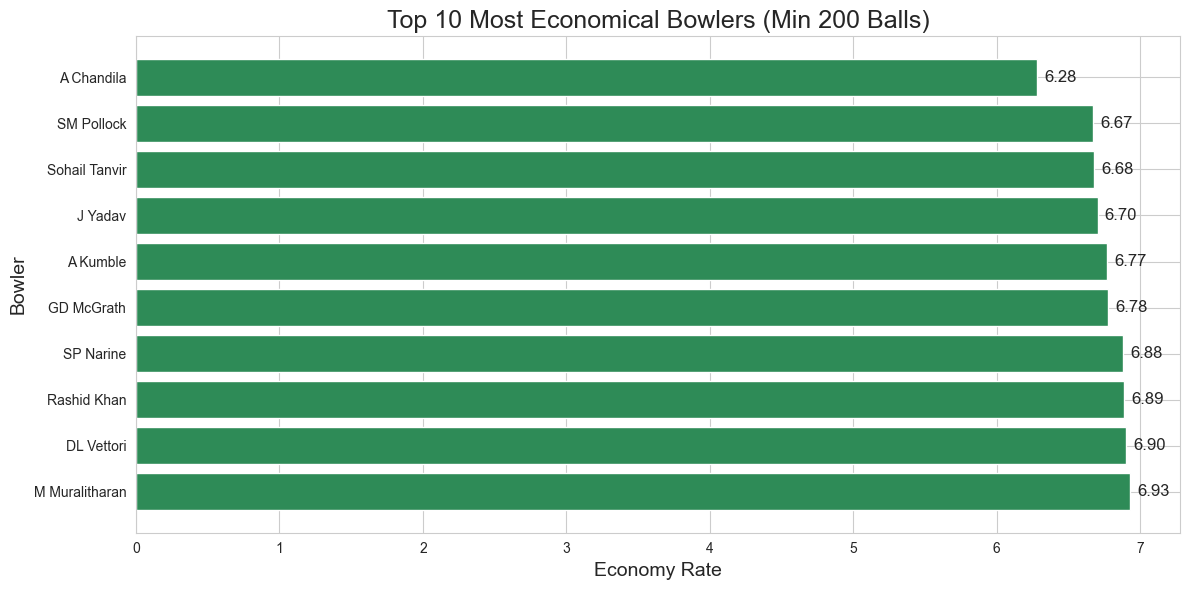

<Figure size 640x480 with 0 Axes>

In [89]:
economy_top10 = economy.sort_values().head(10)

plt.figure(figsize=(12,6))
plt.barh(economy_top10.index, economy_top10.values, color='seagreen')

plt.xlabel("Economy Rate", fontsize=14)
plt.ylabel("Bowler", fontsize=14)
plt.title("Top 10 Most Economical Bowlers (Min 200 Balls)", fontsize=18)

for index, value in enumerate(economy_top10.values):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center', fontsize=12)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()
plt.savefig('bowler economy')

## Observation:  
A Chandila, Narine, A Kumble, Rashid Khan show elite economy.  
These bowlers consistently choke runs in the middle overs.  
Death bowlers like Malinga don't appear here because they bowl in tougher overs.

## Toss Impact Analysis


In [90]:
toss_win=df[df['toss_winner']==df['winner']].shape[0]
total_matches=df.shape[0]
toss_win_pct=(toss_win/total_matches)*100
toss_win_pct

51.587301587301596

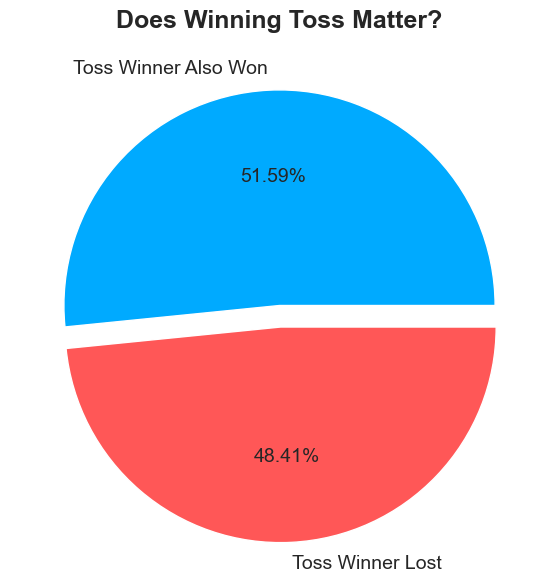

<Figure size 640x480 with 0 Axes>

In [91]:
labels = ['Toss Winner Also Won', 'Toss Winner Lost']
values = [toss_win, total_matches - toss_win]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.2f%%',
        explode=[0,0.1], colors=['#00aaff','#ff5757'],
        textprops={'fontsize':14})
plt.title("Does Winning Toss Matter?", fontsize=18, fontweight='bold')
plt.show()
plt.savefig('toss win')

### Insight

Winning the toss results in victory only about half the time.  
Execution, bowling depth, and batting collapse prevention matter far more than toss decisions.


## Death Overs Analysis

The final overs are where matches are won and lost.


In [92]:
death_df=final_df[final_df['over']>15]
death_runs=death_df.groupby('batsman')['batsman_runs'].sum()
death_balls=death_df[(death_df['wide_runs']==0) & (death_df['noball_runs']==0)].groupby('batsman').size()
death_balls=death_balls[death_balls>200]
death_sr=(death_runs/death_balls)*100
death_sr.sort_values(ascending=False).head(15).reset_index(name='strike rate')

,batsman,strike rate
0,RR Pant,234.951456
1,AB de Villiers,227.009646
2,CH Gayle,220.089286
3,AD Russell,215.561224
4,SV Samson,195.283019
5,V Kohli,193.299832
6,DA Warner,191.044776
7,SR Watson,190.598291
8,DA Miller,185.301205
9,Yuvraj Singh,184.412955


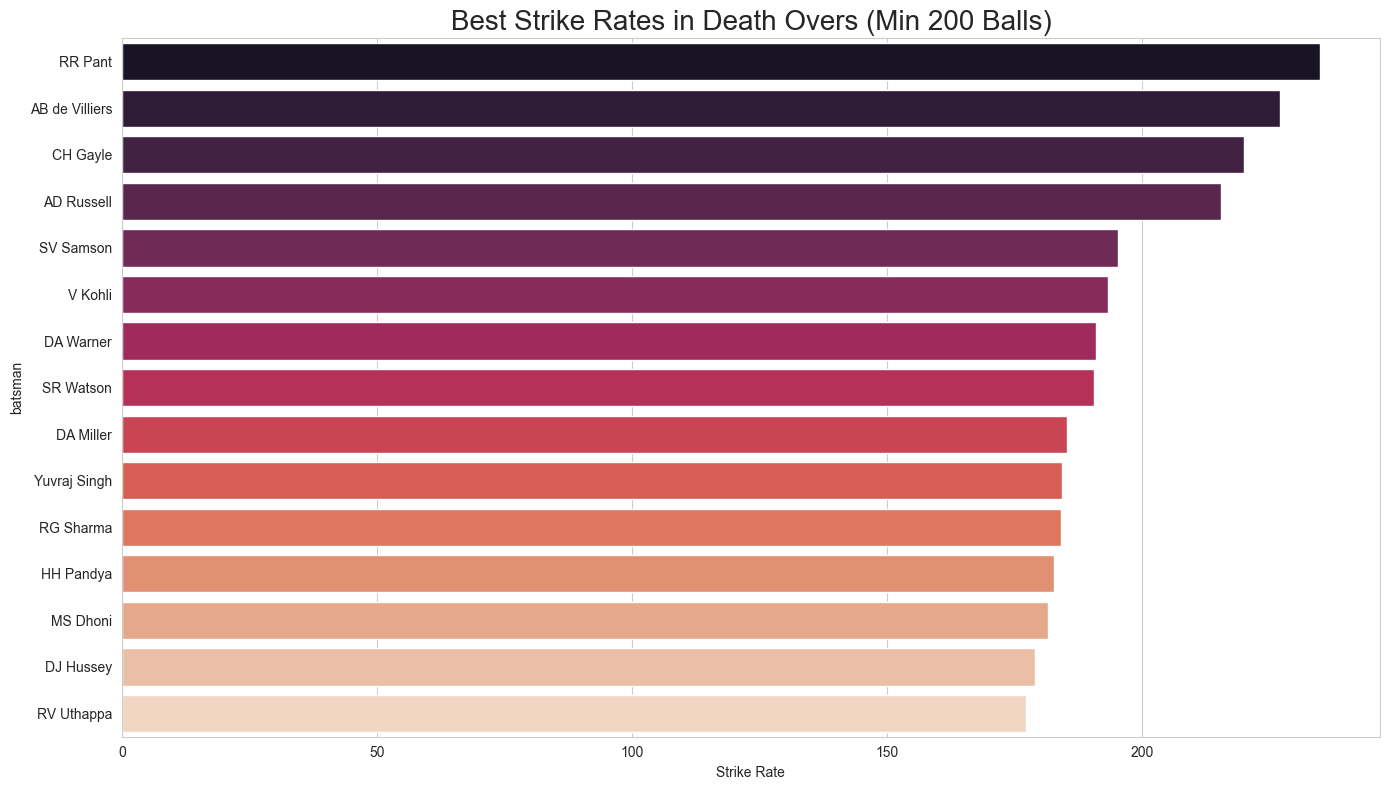

<Figure size 640x480 with 0 Axes>

In [93]:
top_death = death_sr.sort_values(ascending=False).head(15)
sns.set_style("whitegrid")
plt.figure(figsize=(14,8))
sns.barplot(x=top_death.values, y=top_death.index, palette="rocket", hue=top_death.index)
plt.title("Best Strike Rates in Death Overs (Min 200 Balls)", fontsize=20)
plt.xlabel("Strike Rate")
plt.tight_layout()
plt.show()
plt.savefig('death overs')

### Observation

ABD, Russell, Pant and Dhoni dominate death overs not just due to power hitting but shot-selection under pressure.


In [94]:
final_df.to_csv("IPL_merged.csv", index=False)

## Conclusion:
The IPL dataset reveals clear patterns in team structure, match strategy, and player performance.  
MI and CSK demonstrate long-term excellence through balanced squads.  
While top-performing teams combine strong finishers with economical bowlers.   
Strike rate and death-over performance highlight the true match-winners—ABD, Russell, Dhoni, and Kohli.  
Bowling impact is defined by economy rather than wickets alone, favoring disciplined bowlers like Narine and Rashid Khan.  
Toss influence is minimal, proving that execution and team quality matter more than chance.  
Overall, this analysis provides a complete performance snapshot of teams, players, and match dynamics across IPL seasons.

## Next Steps

Planned:
- Feature engineering for machine learning
- Match outcome prediction model
- Player impact ranking system
